In [2]:
import cv2, tensorflow, os, csv, shutil
import numpy                as np
import matplotlib.pyplot    as plt
from tqdm                    import tqdm
from tensorflow.keras.models                import Sequential
from tensorflow.keras.layers                import Convolution2D
from tensorflow.keras.layers                import MaxPooling2D
from tensorflow.keras.layers                import Flatten
from tensorflow.keras.layers                import Dense
from tensorflow.keras.layers                import Dropout
from tensorflow.keras.preprocessing.image   import ImageDataGenerator

2022-11-03 04:26:06.059877: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# This part we train our model without ImageDataGenerator(不做資料擴增的意思)
class_names = ['dog_bark', 
               'children_playing',
               'car_horn', 
               'air_conditioner', 
               'engine_idling', 
               'siren',
               'jackhammer',
               'drilling',
               'street_music',
               'gun_shot']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (256, 256)

class_names_label

{'dog_bark': 0,
 'children_playing': 1,
 'car_horn': 2,
 'air_conditioner': 3,
 'engine_idling': 4,
 'siren': 5,
 'jackhammer': 6,
 'drilling': 7,
 'street_music': 8,
 'gun_shot': 9}

### 計算Dataset數量

In [4]:
numberOfDatasets = {'dog_bark' : 0,
                    'children_playing' : 0,
                    'car_horn' : 0,
                    'air_conditioner' : 0,
                    'engine_idling' : 0,
                    'siren':0,
                    'jackhammer':0,
                    'drilling':0,
                    'street_music' : 0,
                    'gun_shot' : 0
                    }
with open('UrbanSound8K.csv', newline = '') as csvfile:
    allAudioFiles = csv.DictReader(csvfile)
    for audio in allAudioFiles:
        if audio['class'] == 'dog_bark':
            numberOfDatasets['dog_bark'] += 1
        elif audio['class'] == 'children_playing':
            numberOfDatasets['children_playing'] += 1
        elif audio['class'] == 'car_horn':
            numberOfDatasets['car_horn'] += 1
        elif audio['class'] == 'air_conditioner':
            numberOfDatasets['air_conditioner'] += 1
        elif audio['class'] == 'engine_idling':
            numberOfDatasets['engine_idling'] += 1
        elif audio['class'] == 'siren':
            numberOfDatasets['siren'] += 1
        elif audio['class'] == 'jackhammer':
            numberOfDatasets['jackhammer'] += 1
        elif audio['class'] == 'drilling':
            numberOfDatasets['drilling'] += 1
        elif audio['class'] == 'street_music':
            numberOfDatasets['street_music'] += 1
        elif audio['class'] == 'gun_shot':
            numberOfDatasets['gun_shot'] += 1
print(numberOfDatasets.keys)
print(numberOfDatasets)

<built-in method keys of dict object at 0x7fdbc69da440>
{'dog_bark': 1000, 'children_playing': 1000, 'car_horn': 429, 'air_conditioner': 1000, 'engine_idling': 1000, 'siren': 929, 'jackhammer': 1000, 'drilling': 1000, 'street_music': 1000, 'gun_shot': 374}


In [3]:
from shutil import copy2


amount = {  'dog_bark' : 0,
            'children_playing' : 0,
            'car_horn' : 0,
            'air_conditioner' : 0,
            'engine_idling' : 0,
            'siren':0,
            'jackhammer':0,
            'drilling':0,
            'street_music' : 0,
            'gun_shot' : 0
        }

with open('UrbanSound8K.csv', newline = '') as csvfile:
    allAudioFiles = csv.DictReader(csvfile)
    for audio in allAudioFiles:
        folder          = audio['fold']
        sliceFileName   = audio['slice_file_name'][:-4] + '.png'
        testTrain       = ''
        imageClass      = audio['class']
        
        amount[imageClass] += 1
        destFolder = 'all_set'
        # if amount[imageClass] < numberOfDatasets[imageClass] * 0.8 :
        #         testTrain = 'training_set'
        # else :
        #         testTrain = 'test_set'
        src_path  = "Images_Backups/{fold}/{slice_file_name}".format( fold = folder,
                                                              slice_file_name = sliceFileName)
        if not os.path.exists("Images/{mode}/{image_class}".format(     mode = destFolder,
                                                                        image_class = imageClass)):
                os.makedirs("Images/{mode}/{image_class}".format(     mode = destFolder,
                                                                        image_class = imageClass))
        dest_path = "Images/{mode}/{image_class}/{slice_file_name}".format( mode = destFolder,
                                                                            image_class = imageClass,
                                                                            slice_file_name = sliceFileName)
        # print(src_path)
        # print(dest_path)

        shutil.move(src = src_path,
                    dst = dest_path,
                    copy_function = copy2)

Images/5/100032-3-0-0.png
Images/all_set/dog_bark/100032-3-0-0.png
Images/5/100263-2-0-117.png
Images/all_set/children_playing/100263-2-0-117.png
Images/5/100263-2-0-121.png
Images/all_set/children_playing/100263-2-0-121.png
Images/5/100263-2-0-126.png
Images/all_set/children_playing/100263-2-0-126.png
Images/5/100263-2-0-137.png
Images/all_set/children_playing/100263-2-0-137.png
Images/5/100263-2-0-143.png
Images/all_set/children_playing/100263-2-0-143.png
Images/5/100263-2-0-161.png
Images/all_set/children_playing/100263-2-0-161.png
Images/5/100263-2-0-3.png
Images/all_set/children_playing/100263-2-0-3.png
Images/5/100263-2-0-36.png
Images/all_set/children_playing/100263-2-0-36.png
Images/10/100648-1-0-0.png
Images/all_set/car_horn/100648-1-0-0.png
Images/10/100648-1-1-0.png
Images/all_set/car_horn/100648-1-1-0.png
Images/10/100648-1-2-0.png
Images/all_set/car_horn/100648-1-2-0.png
Images/10/100648-1-3-0.png
Images/all_set/car_horn/100648-1-3-0.png
Images/10/100648-1-4-0.png
Images/a

In [20]:
def load_data():
    datasets = ['Images/training_set', 'Images/test_set']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            if folder == ".DS_Store":
                continue
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                if file == "desktop.ini":
                    break
                if file == ".DS_Store":
                    continue
                # Open and resize the img
                # print(img_path)
                image = cv2.imread(img_path)
                # print(image.shape)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [21]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading Images/training_set


100%|██████████| 499/499 [00:02<00:00, 188.46it/s]


Loading Images/test_set


100%|██████████| 501/501 [00:02<00:00, 200.24it/s]


In [22]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [24]:
model = Sequential()
model.add(Convolution2D(256 , 3, 3, padding = 'same', input_shape = (256, 256, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size  = (2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(512 , 3, 3, padding = 'same', input_shape = (256, 256, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size  = (2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

2022-10-17 20:18:38.345141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [26]:
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels),
                    #verbose=2,callbacks=[earlyStop],
                    batch_size=32, epochs=50)

Epoch 1/50
137/137 [==============================] - 177s 1s/step - loss: 2.2796 - accuracy: 0.1292 - val_loss: 2.2009 - val_accuracy: 0.1744
Epoch 2/50
137/137 [==============================] - 161s 1s/step - loss: 1.9306 - accuracy: 0.2924 - val_loss: 1.9724 - val_accuracy: 0.2818
Epoch 3/50
137/137 [==============================] - 159s 1s/step - loss: 1.6957 - accuracy: 0.3815 - val_loss: 1.8328 - val_accuracy: 0.3509
Epoch 4/50
137/137 [==============================] - 160s 1s/step - loss: 1.5533 - accuracy: 0.4538 - val_loss: 1.7612 - val_accuracy: 0.4057
Epoch 5/50
137/137 [==============================] - 160s 1s/step - loss: 1.4986 - accuracy: 0.4609 - val_loss: 1.7058 - val_accuracy: 0.4199
Epoch 6/50
137/137 [==============================] - 160s 1s/step - loss: 1.4552 - accuracy: 0.4781 - val_loss: 1.7507 - val_accuracy: 0.3986
Epoch 7/50
137/137 [==============================] - 165s 1s/step - loss: 1.3903 - accuracy: 0.5045 - val_loss: 1.7404 - val_accuracy: 0.4098

In [27]:
model.save('Sound8k_10_Class_Epoch_100_Batch_32.h5')

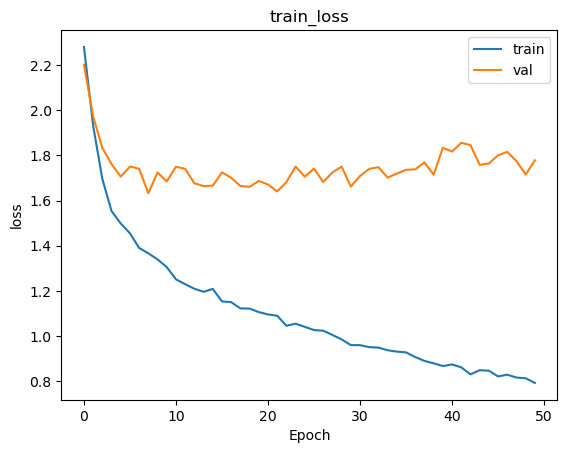

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('loss.png')
plt.show()

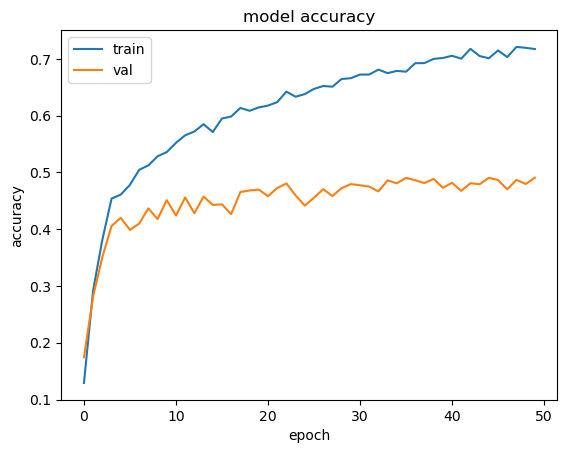

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Acc.png')
plt.show()